## Numeric Integration

What does the reaction progress of enzyme kinetics look like over a long stretch of time, far past the initial rate from which we have not yet dared stray? The math is similar to the case of the steady-state kinetic scheme above. However, in the MM system, one of the reactants, the enzyme, is present at limiting quanties ($[E]_t \ll [S]_t$) and this case gives rise to the famous Michaleis-Menten equation.

First we state the model scheme for the reaction.

$$ E + S\rightleftharpoons ES \rightarrow P$$

And could be expressed with the following reactions.

$$E + S \xrightarrow{k_1} ES \\ 
ES \xrightarrow{k_{-1}}  E + S\\
ES \xrightarrow{k_{cat}} P + E$$

If we ensure that $[E]_t \ll [S]_t$ then we can derive the famous Michaleis-Menten equation.

$$\nu = k_{cat}[E]_t\frac{[S]_t}{K_M+[S]_t}$$



This equation can be integrated analytically using advanced mathematical methods that you will likely never care to learn. I certainly have no clue how to integrate anything but the simplest equations. So, yes, you will never use calculus again in your life but only because others have done the calculus for you already. Understanding the basics of calculus is important if you are to properly stand on the shoulders of mathematicians. The analytical integration was demonstrated in the previous notebook.

In this notebook will not use analytical methods but instead use the numerical algorithms encapsulated the Python tools. We will use `scipy.integration.odeint()`.

## Using *odient*

The `scipy.integration.odeint()` function will perform a numeric integration of ordinary differential equations. It is simpler to set up than the analytical integration and, in well behaved cases, is very acurate. Let us perform a numerical integration of the Michaelis-Menten system. We can then compare the results with the analytical method.

The code below calculates the instantaneous rate for each elementary reaction in the Michaelis-Menten system and then integrates the whole system using numerical methods. Using the reaction scheme outlined above we can define the following rates at a given moment in time.

$$r_s = \frac{d}{dt}[S]= -(k_1 [S][E])+(k_{-1}[ES])$$

$$r_e = \frac{d}{dt}[E] = -(k_1 [S][E])+(k_{-1}[ES])+(k_{cat}  [ES])$$

$$r_{es} = \frac{d}{dt}[ES] = (k_1 [S][E])-(k_{cat}[ES])-(k_{-1}  [ES])$$
    
$$r_p = \frac{d}{dt}[P] = k_{cat} [ES]$$

If we know the values of [S], [E] and [ES] at a given moment in time then we can easily calculate the rate of change in each using the above equation. There is only one place where we know these values for sure an that is at time zero. So we start there, calculate the rates, calculate the changes after an infinitesimal amount of time and then start again with the new concentrations and repeat endlessly. Obviously there are mathematical approaches to this and they all use various methods to minimize the error caused when the time step used is anything greater than $\frac{1}{\infty}$.

So we know that the numerical approach should be close to the true answer but can never be exact. The analytical method is exact but, as we saw, is very difficult with some kinds of equations.

Km: 0.0050 mM
Vmax: 12000000.00 uM min
kcat/Km: 4.0004e+07


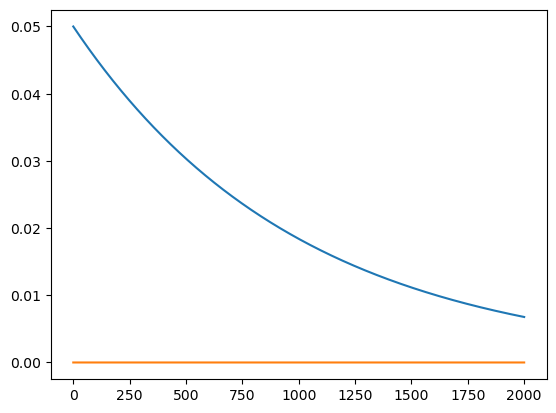

In [20]:
#######################
### import packages ###
#######################

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def rates(c, t, K1, K_1, Kcat):

    S = c[0]; E = c[1]; ES = c[2]; P = c[3]  # assign initial conc. from input list c

    r_s = -(K1 * S * E)+(K_1 * ES)            # rates of each reaction step with give concentration in list c
    r_e = -(K1 * S * E)+(K_1 * ES)+(Kcat * ES)
    r_es = (K1 * S * E)-(Kcat * ES)-(K_1 * ES)
    r_p = Kcat * ES
    return [r_s, r_e, r_es, r_p]

#########################################
### Create series of time points      ###
#########################################

dt = .1                                  # time step, delta t
tmax = 2000                            # max time, s
t = np.linspace(0, tmax, num=int(tmax/dt)) # time vector (list of time points)
nt = len(t)                                # total number of time steps

############################################
### Create a function that describes the ###
### rates of all reactions in the system ###
############################################

k1 = 1E7
k_1 = 2E9
kcat = 2E5
E_conc = 1E-6
S_conc = .05

KM_model = k1/(k_1 + kcat)

print(f"Km: {KM_model:0.4f} mM")
print(f"Vmax: {kcat*E_conc*1E6*60:0.2f} uM min")
print(f"kcat/Km: {kcat/KM_model:0.4e}")
initial = [S_conc, E_conc, 0, 0.]
cc = odeint(rates, initial, t, args=(k1,k_1,kcat))
plt.plot(t,cc[:,0])                    # Plot only the values for S (column #0 of the array)
#plt.plot(t,cc[:,1])                    # Plot only the values for E (column #1 of the array)
plt.plot(t,cc[:,2])                    # Plot only the values for ES (column #2 of the array)
#plt.plot(t,cc[:,3])                    # Plot only the values for P (column #3 of the array)

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined four plots

In [2]:
#k1 = 1E7
#k_1 = 4E9
#kcat = 5.3E4

####################################################################
### The function odeint() from scipy.integrate takes a function, ###
### a list of initial conditions, and an array of time points.   ###
### It returns a matrix with each column being the result for    ###
### each variable at each time point.                            ###
####################################################################

#plt.plot(t,cc[:,0])                    # Plot only the values for S (column #0 of the array)
#plt.plot(t,cc[:,1])                    # Plot only the values for E (column #1 of the array)
#plt.plot(t,cc[:,2])                    # Plot only the values for ES (column #2 of the array)
#plt.plot(t,cc[:,3])                    # Plot only the values for P (column #3 of the array)


#######################################
### Output the three combined plots ###
#######################################



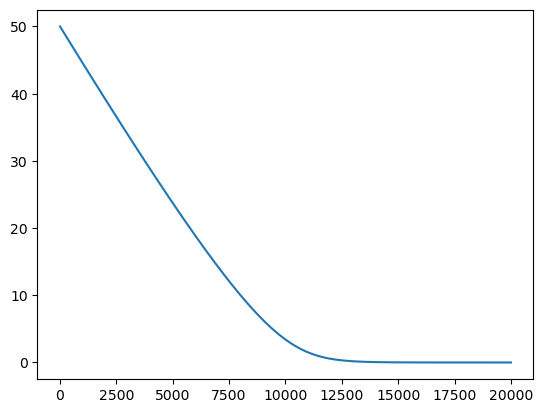

In [3]:
#######################
### import packages ###
#######################

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def rates(c, t, Vmax, Km):

    r = -Vmax * c / (c + Km)
    return r

#########################################
### Create series of time points      ###
#########################################

dt = 10                                  # time step, delta t
tmax = 20000                           # max time, s
t = np.linspace(0, tmax, num=int(tmax/dt)) # time vector (list of time points)
nt = len(t)                                # total number of time steps

############################################
### Create a function that describes the ###
### rates of all reactions in the system ###
############################################

KM_value = 5          ### set KM value
Vmax_value = 0.006     ### set Vmax value
S0_value = 50         ### set initial substrate concentration value

time_end = 20000          ### The end time
n_points = 10        ### number of points - increase if needed

xmax = time_end       ### change these as you wish
ymax = S0_value


initial = S0_value
cc = odeint(rates, initial, t, args=(Vmax_value, KM_value))

plt.plot(t,cc)             # Plot only the values for S (column #0 of the array)

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined four plots